### Natural language processing - sentiment analysis for Tesla using Twitter
*Based on https://www.coursera.org/specializations/jhu-data-science*



Let's compute the sentiment of each tweet based on the sentiment scores of the terms in the tweet. For the simplicity, we assume that the sentiment of a tweet is equivalent to the sum of the sentiment scores for each term in the tweet.

The file AFINN-111.txt contains a list of pre-computed sentiment scores. Each line in the file contains a word or phrase followed by a sentiment score. For example, catastrophic:-4; breathtaking:+5.

Each word or phrase that is found in a tweet but not found in AFINN-111.txt should be given a sentiment score of 0. See the file AFINN-README.txt for more information.

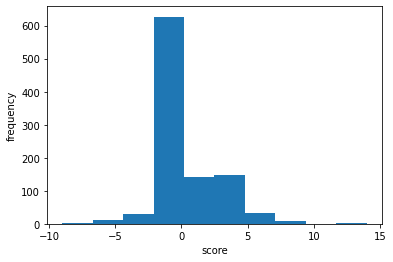

The final score is: 0.651


In [1]:
import json

# Latest 1000 tweets about Tesla
tweets = []
infile = open('tesla_tweets_1000.txt')
for line in infile.readlines():
    tweets.append(json.loads(line))
infile.close()

# I assume that the sentiment of a tweet is equivalent to the sum of the sentiment scores for each term in the tweet.
# The file AFINN-111.txt contains a list of pre-computed sentiment scores. 
# Each line in the file contains a word or phrase followed by a sentiment score.


def build_sent_dictionary(sent_filename):
    # initialize an empty dictionary
    sent_dictionary = {} 
    afinnfile = open(sent_filename)
    for line in afinnfile:
        # The file is tab-delimited. "\t" means "tab character"
        term, score  = line.split("\t")  
        # Convert the score to an integer.
        sent_dictionary[term] = int(score)
    afinnfile.close()  
    # Print every (term, score) pair in the dictionary
    #print sent_dictionary.items() 
    return sent_dictionary

import string

def rate_sentiments(tweets, sent_dictionary):
    scores = []
    for tweet in tweets:
        score = 0
        words = [word.strip(string.punctuation) for word in tweet['full_text'].split()]
        for word in words:
            if word in sent_dictionary: 
                score += sent_dictionary[word]
        scores.append(score)
    return scores

sent_dictionary = build_sent_dictionary('AFINN-111.txt')
scores = rate_sentiments(tweets, sent_dictionary)

import matplotlib.pyplot as plt
%matplotlib inline   

n, bins, patches=plt.hist(scores, bins=10)
plt.ylabel("frequency")
plt.xlabel("score")
plt.show()

import numpy as np
print("The final score is:",np.mean(scores))

It's slightly positive! 
But let´s give a closer look to the top positive  and negative tweets

In [2]:
def print_tweet(tweet):
    print(tweet['created_at'], tweet['user']['name'], tweet['full_text'])
    print(80 * '-')

scores_ind = enumerate(scores)
scores_ind = sorted(scores_ind, key=lambda x: x[1])

n_tweets = 10
for i in range(n_tweets):
    print_tweet(tweets[scores_ind[len(tweets) - i - 1][0]])
print(80 * '-')
for i in range(n_tweets):
    print_tweet(tweets[scores_ind[i][0]])

Sun Sep 23 06:43:25 +0000 2018 Patrick Frickel @HaydenGerson @GuyTesla @elonmusk @Tesla @ElonBachman @ElonsPromises @TeslaCharts @markbspiegel When life is great take advantage. Spoil yourself and get your mind off people like Musk and the rest of his enthusiastic volunteers. They seem to be having fun. You deserve some too.
--------------------------------------------------------------------------------
Sun Sep 23 05:02:13 +0000 2018 James Locke This hotel is great, the maintenance gentleman was watching spot for me after I called. We had a good chat. He is impressed with Tesla and says the charger has been working great since installed a couple years ago. Happy to hear Tesla growing &amp; said they should get more chargers
--------------------------------------------------------------------------------
Sun Sep 23 05:10:06 +0000 2018 San RT @GuyTesla: I delivered a #Model3 today, helping out @elonmusk and the @Tesla team. So fun to watch new owners delight in everything the…
---------

Automatic sentiment detection is one of the most interesting problems in natural language processing (NLP). The main issue is the complexity of our language, one word can completely change the meaning of a sentence. Also, you can think of such things as subjectivity, tone, context, irony, sarcasm, and many others!

# Tweets data mining
Tweeter offers a enormous amount of information which can be used for various purpose.
It follows few examples of the kind of data it is possible to obtain from Twitter.

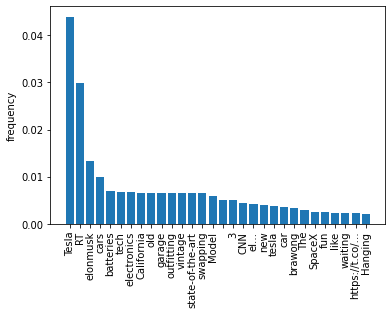

In [3]:
def word_frequency(tweets):
    word_freq = {}
    word_count = 0
    for tweet in tweets:
        words = [word.strip(string.punctuation) for word in tweet['full_text'].split()]
        #print words
        for word in words:
            if word not in word_freq: 
                word_freq[word] = 0
            word_freq[word] += 1
            word_count += 1
    for word in word_freq:
        word_freq[word] /= word_count
    return word_freq

word_freq = word_frequency(tweets)
import nltk
from nltk.corpus import stopwords
for sw in stopwords.words('english'):
    if sw.upper() in word_freq.keys():
        del word_freq[sw.upper()]
    if sw.lower() in word_freq.keys():
        del word_freq[sw.lower()]

word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
#print(word_freq_sorted)
n_plot = 30
y = [x[1] for x in word_freq_sorted[:n_plot]]
l = [x[0] for x in word_freq_sorted[:n_plot]]
plt.bar(l, y)
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

## Top hashtags

In [4]:
def top_hashtags(tweets):
    hashtags = {}
    for tweet in tweets:
        tweet_hashtags = tweet['entities']['hashtags']
        for hashtag in tweet_hashtags:
            if hashtag['text'] not in hashtags:
                hashtags[hashtag['text']] = 0
            hashtags[hashtag['text']] += 1
    return hashtags

hashtags = top_hashtags(tweets)
hashtags_sorted = sorted(hashtags.items(), key=lambda x: x[1], reverse=True)
print(hashtags_sorted[:10])

[('Tesla', 59), ('tesla', 49), ('specad', 40), ('elonmusk', 40), ('spacex', 40), ('Model3', 17), ('IOTA', 12), ('model3', 9), ('CleanTechnica', 8), ('ElectricVehicle', 7)]


## User location

In [5]:
tweets_place, tweets_coord, tweets_user_location = 0, 0, 0
for tweet in tweets:
    if tweet['coordinates']:
        tweets_coord += 1
    if tweet['place']:
        tweets_place += 1
    if tweet['user']['location']:
        tweets_user_location += 1

states_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

import re


def get_state_from_str(text, states_dict):
    state = None
    for k, v in states_dict.items():
        searchObj = re.search(v, text, re.IGNORECASE)
        if searchObj: 
            state = k
        else:
            searchObj = re.search(k, text)
            if searchObj: 
                state = k
    return state


states = []
for tweet in tweets:
    state = None
    if tweet['place'] and tweet['place']['country_code'] == 'US':
        state = get_state_from_str(tweet['place']['full_name'], states_dict)
    if state is None and tweet['user']['location']:
        state = get_state_from_str(tweet['user']['location'], states_dict)
    states.append(state)

# Let's iterate through the tweets again to find a mean value of sentiment scores for each state.

scores_by_state = {}
for score_i, score in enumerate(scores):
    state = states[score_i]
    if state is not None:
        if state not in scores_by_state:
            scores_by_state[state] = []
        scores_by_state[state].append(score)

state_score_mean = {}
for k in scores_by_state:
    state_score_mean[k] = np.mean(scores_by_state[k])

# Sorted list of the mean sentiment scores for each state. 
state_score_mean_sorted = sorted(state_score_mean.items(), key=lambda x: x[1], 
                                 reverse=True)
for state, score in state_score_mean_sorted:
    print(states_dict[state], score)

Indiana 3.0
Hawaii 3.0
Rhode Island 3.0
Oklahoma 2.5
Massachusetts 2.0
National 2.0
Illinois 1.8
Missouri 1.6666666666666667
Arizona 1.5714285714285714
Florida 1.4166666666666667
Oregon 1.375
Washington 1.2
Virginia 1.0
Connecticut 1.0
New Jersey 1.0
California 0.9090909090909091
Utah 0.5
New York 0.35714285714285715
Nevada 0.25
Montana 0.0
Nebraska 0.0
Maine 0.0
New Mexico 0.0
Kentucky 0.0
Kansas 0.0
Alabama 0.0
Idaho 0.0
Georgia -0.5
Minnesota -0.5
North Carolina -0.5
Texas -0.75
Wisconsin -1.0
Pennsylvania -1.0
Colorado -1.375
Delaware -2.0
Alaska -2.0
Louisiana -4.0
